In [3]:
import pandas as pd

In [5]:
dataset=pd.read_csv("50_Startups.csv")

In [7]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [9]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [11]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']]
independent

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


In [13]:
dependent=dataset[['Profit']]
dependent

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error', max_features=None, splitter='best')
regressor.fit(x_train,y_train )
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
rscore=r2_score(y_test,y_pred)
rscore

0.9623738064931651

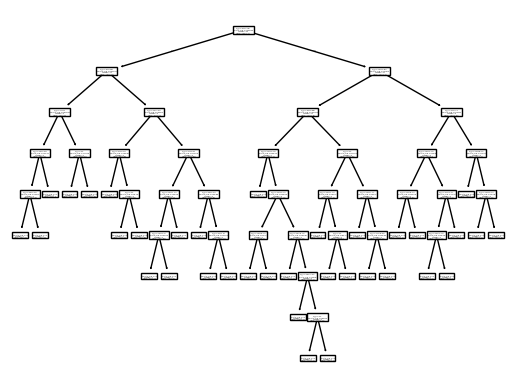

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [48]:
import pickle as p
filename="Finalized_Model_Decision_tree.sav"
p.dump(regressor,open(filename,'wb'))